## Analysis taken from <a href="https://onlinecourses.science.psu.edu/stat501/node/295/">Stats 501</a>


One piece of this bothers me, namely that the MSR (<a href="https://www.britannica.com/science/mean-square-due-to-regression">Mean Square Due to Regressions</a>) is independent of Mean Square Error of the full model, and is chi-squared distributed with $(p_F - p_R)$ degrees of freedom.   Since I can't figure out how to derive it, lets test it.

In [191]:
%matplotlib inline
from __future__ import print_function
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import scipy as sc
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math


In [221]:
slopeActual = 10.5
interceptActual = 5
noiseAmp = 1

def generateValues(sampleSize, slopeX, slopeZ, intercept, noiseAmp):    
    output = []
    for i in range(sampleSize):
        x = random.random()*3
        y = random.random()*3    
        z = x*slopeX + y*slopeZ + intercept
        output.append((x + random.gauss(0,noiseAmp), y + random.gauss(0,noiseAmp), z + random.gauss(0,noiseAmp)))
    
    #zip converts a k long list of n-tuples into a n long list of k tuples
    data = map(list, zip(*output))
    return (np.array(data[0]), np.array(data[1]), np.array(data[2]))


In [222]:
(x,y,z) = generateValues(50, 5, 3,1,0.2)

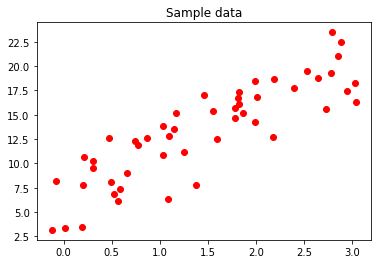

In [223]:
plt.plot(x,z, 'ro')
plt.title("Sample data")
plt.show()

#### Performing the linear regression

In [224]:
inputs = np.array([x,y]).transpose()
regr = linear_model.LinearRegression()
regr.fit(inputs,z.reshape(-1,1))
params = regr.get_params()
z_predicted = regr.predict(inputs)
m = regr.coef_[0][0]
b = regr.intercept_[0]

z_bar = z.mean()
print("m = {:.2f}; b = {:.2f}".format(m,b))
print("z_bar = {:.2f}".format(y_bar))

m = 4.66; b = 1.80
z_bar = 7.64


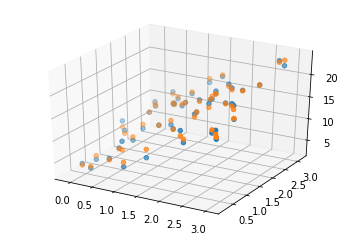

In [225]:
# plt.plot(x, z_predicted[:,0], 'ro')
# plt.plot(x,z,'^')
# plt.title("Sample data")
# plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.scatter(x, y, z_predicted, 'gray')


#### F-statistic measures

In [226]:
SSE_R = ((z-z_bar)**2).sum()
SSE_F = ((z-z_predicted[:,0])**2).sum()
F_Statistic = (SSE_R - SSE_F)/(SSE_F/49)
print("SSE_R = {:.2f}; SSE_F = {:.2f}; F-Statistic = {:.2f}".format(SSE_R, SSE_F, F_Statistic))

SSE_R = 1217.82; SSE_F = 24.54; F-Statistic = 2382.98


In [227]:
#Fstatistic generating function
def fStat(n, m1, m2, b, noise):
    #generate some sample data
    (x,y,z) = generateValues(n, m1, m2, b, noise)
    #fit the data to our model
    inputs = np.array([x,y]).transpose()
    regr = linear_model.LinearRegression()
    regr.fit(inputs,z.reshape(-1,1))
    z_predict = regr.predict(inputs)
    z_bar = z.mean()
    SSE_R = ((z-z_bar)**2).sum()
    SSE_F = ((z-z_predict[:,0])**2).sum()
    return ((SSE_R - SSE_F), (SSE_F/(n-1)))

In [238]:
nSamples = 10000
data = [fStat(100, 0, 0, 2, .5)[0] for i in range(nSamples)]
(hist, edges) = np.histogram(data, 'auto')

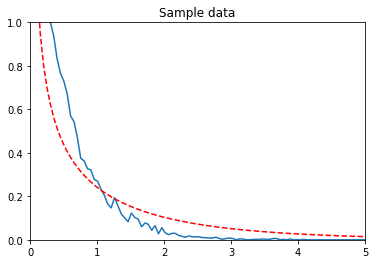

In [239]:
plt.plot(edges[:-1], hist/(hist.sum()*(edges[1]- edges[0])), linestyle="-")
plt.plot(edges[:-1], sc.stats.chi2.pdf(edges[:-1],1), color='r', linestyle="--")
plt.title("Sample data")
plt.ylim(0,1.0)
plt.xlim(0,5.0)
plt.show()